## Final Project

## Name: Kathryn Lee

Make sure you are in the DATA1030 environment:

In [2]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.5"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.5"):
    print(FAIL, "Python version 3.12.5 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.26.4", 'matplotlib': "3.9.2",'sklearn': "1.5.1", 
                'pandas': "2.2.2",'xgboost': "2.1.1", 'shap': "0.45.1", 
                'plotly': "5.23.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.5

[ OK ] numpy version 1.26.4 is installed.
[ OK ] matplotlib version 3.9.2 is installed.
[ OK ] sklearn version 1.5.1 is installed.
[ OK ] pandas version 2.2.2 is installed.
[ OK ] xgboost version 2.1.1 is installed.
[ OK ] shap version 0.45.1 is installed.
[ OK ] plotly version 5.23.0 is installed.


## Read in the data
The dataset is located in the `data` folder.

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/Myocardial infarction complications Database.csv')
display(df)

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1


**Input Data:** Columns 2-112 represent patient information (medical history, test results, etc.) used for prediction. Different columns may be excluded at different time stages. \
**Output Data:** Columns 113-124 represent possible complications, which serve as the target variables for prediction.

# EDA

**Q1** How many rows and columns do we have in the dataframe (how many datapoints and features are there)?  
1700 rows, 124 columns

**Q2** What are the data types of the columns? Make sure that the output is not truncated and you see the type of each column.

In [3]:
pd.set_option('display.max_rows', 124) # prevent truncation
print('Data types of features:')
print(df.dtypes)

Data types of features:
ID                 int64
AGE              float64
SEX                int64
INF_ANAM         float64
STENOK_AN        float64
FK_STENOK        float64
IBS_POST         float64
IBS_NASL         float64
GB               float64
SIM_GIPERT       float64
DLIT_AG          float64
ZSN_A            float64
nr_11            float64
nr_01            float64
nr_02            float64
nr_03            float64
nr_04            float64
nr_07            float64
nr_08            float64
np_01            float64
np_04            float64
np_05            float64
np_07            float64
np_08            float64
np_09            float64
np_10            float64
endocr_01        float64
endocr_02        float64
endocr_03        float64
zab_leg_01       float64
zab_leg_02       float64
zab_leg_03       float64
zab_leg_04       float64
zab_leg_06       float64
S_AD_KBRIG       float64
D_AD_KBRIG       float64
S_AD_ORIT        float64
D_AD_ORIT        float64
O_L_POST         float64
K

**Q3** What is the breakdown of the different features?

According to the supplementary `Myocardial infarction complications Database description` file, I can use all input columns (2-112) except 94, 95, 101, 102, 104, and 105 for prediction since I am focusing on patient data collected at the end of the first day (24 hours after admission to the hospital). **Thus, I have dropped features R_AB_2_n, R_AB_3_n, NA_R_2_n, NA_R_3_n, NOT_NA_2_n, and NOT_NA_3_n, as well as ID since that feature does not contribute to the predictive power of the model. I have also dropped all target variables except `LET_IS` since I do not know how to handle multivariate prediction problems (Professor Zsom advised that I do this).**  

The features, excluding the ones above, include:
1. **Continuous variables:** AGE (years), S_AD_KBRIG (mmHg), D_AD_KBRIG (mmHg), S_AD_ORIT (mmHg), D_AD_ORIT (mmHg), K_BLOOD (mmol/L), NA_BLOOD (mmol/L), ALT_BLOOD (IU/L), AST_BLOOD (IU/L), KFK_BLOOD (IU/L), L_BLOOD (billions per liter), ROE (mm)

2. **Categorical (binary):** SEX, IBS_NASL, SIM_GIPERT, nr11, nr01, nr02, nr03, nr04, nr07, nr08, np01, np04, np05, np07, np08, np09, np10, endocr_01, endocr_02, endocr_03, zab_leg_01, zab_leg_02, zab_leg_03, zab_leg_04, zab_leg_06, O_L_POST, K_SH_POST, MP_TP_POST, SVT_POST, GT_POST, FIB_G_POST, IM_PG_P, ritm_ecg_p_01, ritm_ecg_p_02, ritm_ecg_p_04, ritm_ecg_p_06, ritm_ecg_p_07, ritm_ecg_p_08, n_r_ecg_p_01, n_r_ecg_p_02, n_r_ecg_p_03, n_r_ecg_p_04, n_r_ecg_p_05, n_r_ecg_p_06, n_r_ecg_p_08, n_r_ecg_p_09, n_r_ecg_p_10, n_p_ecg_p_01, n_p_ecg_p_03, n_p_ecg_p_04, n_p_ecg_p_05, n_p_ecg_p_06, n_p_ecg_p_07, n_p_ecg_p_08, n_p_ecg_p_09, n_p_ecg_p_10, n_p_ecg_p_11, n_p_ecg_p_12, fibr_ter_01, fibr_ter_02, fibr_ter_03, fibr_ter_05, fibr_ter_06, fibr_ter_07, fibr_ter_08, GIPO_K, GIPER_NA, NA_KB, NOT_NA_KB, LID_KB, NITR_S, LID_S_n, B_BLOK_S_n, ANT_CA_S_n, GEPAR_S_n, ASP_S_n, TIKL_S_n, TRENT_S_n 

3. **Categorical (multi-class):** IBS_POST, ant_im, lat_im, inf_im, post_im 

4. **Ordinal:** INF_ANAM, STENOK_AN, FK_STENOK, GB, DLIT_AG, ZSN_A, TIME_B_S, R_AB_1_n, NA_R_1_n, NOT_NA_1_n  

Many of the categorical and ordinal features are represented as floats, which is a bit hard to catch unless you go through the dataset yourself and read the supplementary document. 

In [4]:
print("Dataset before dropping ID, time-specific unused features, and extra target variables: ", df.shape)
df.drop(df.columns[112:123], axis=1, inplace=True) # drop the unused target variables
df.drop(columns=['ID', 'R_AB_2_n', 'R_AB_3_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_2_n', 'NOT_NA_3_n'], inplace=True) # drop ID and time-specific unused features
print("Dataset after dropping ID, time-specific unused features, and extra target variables: ", df.shape)

Dataset before dropping ID, time-specific unused features, and extra target variables:  (1700, 124)
Dataset after dropping ID, time-specific unused features, and extra target variables:  (1700, 106)


**Q4** Are there any missing values? Describe the basic properties of the missing values (e.g., what fraction of the points have missing values, which features, what fraction of the features are missing, etc).

In [5]:
missing_percentage = df.isna().mean() * 100
missing_percentage_sorted = missing_percentage.sort_values(ascending=True)
print("Missing values percentage per column:")
print(missing_percentage_sorted)
frac_missing = (df.isna().sum(axis=1) != 0).sum() / df.shape[0]
print("Percentage of points with at least one missing value:", 100*round(frac_missing, 4), "%")

Missing values percentage per column:
LET_IS            0.000000
SEX               0.000000
IM_PG_P           0.058824
INF_ANAM          0.235294
NA_R_1_n          0.294118
zab_leg_06        0.411765
zab_leg_04        0.411765
zab_leg_03        0.411765
zab_leg_02        0.411765
zab_leg_01        0.411765
AGE               0.470588
SIM_GIPERT        0.470588
GB                0.529412
NITR_S            0.529412
NOT_NA_1_n        0.588235
endocr_03         0.588235
endocr_02         0.588235
LID_S_n           0.588235
fibr_ter_08       0.588235
fibr_ter_07       0.588235
fibr_ter_06       0.588235
fibr_ter_05       0.588235
fibr_ter_03       0.588235
fibr_ter_02       0.588235
fibr_ter_01       0.588235
B_BLOK_S_n        0.647059
endocr_01         0.647059
GT_POST           0.705882
SVT_POST          0.705882
O_L_POST          0.705882
FIB_G_POST        0.705882
ANT_CA_S_n        0.764706
MP_TP_POST        0.823529
K_SH_POST         0.882353
TRENT_S_n         0.941176
R_AB_1_n         

Notes:
- All columns except for `SEX` and the target variable `LET_IS` contain missing values.  
- Based on this information at first glance, I will drop features `IBS_NASL` (binary categorical) and `KFK_BLOOD` (continuous feature) since these columns have over 80% missing values. This threshold is set since, beyond this point, these columns lack enough information to be helpful in solving the problem.  
- Features `NA_KB`, `LID_KB`, `NOT_NA_KB`, `D_AD_KBRIG`, and `S_AD_KBRIG` are a bit trickier since they do have a significant portion of data missing. I will have to further consider if their missingness is random or critical for analysis, so I won't drop them just yet.  

In [6]:
print("Dataset before dropping features with over 80% missing values: ", df.shape)
df.drop(columns=['IBS_NASL', 'KFK_BLOOD'], inplace=True) # drop features with over 80% missing values
print("Dataset after dropping features with over 80% missing values: ", df.shape)

Dataset before dropping features with over 80% missing values:  (1700, 106)
Dataset after dropping features with over 80% missing values:  (1700, 104)


**Q5** The ML target variable in this dataset is the lethal outcomes. We will develop ML pipelines to predict this variable based on the other features.

Is this column continuous or categorical? Please use .describe or .value_counts to take a quick look at this feature.

I am converting this problem from a multi-class classification problem into a binary classification one for simplicity and dataset size purposes. There don't appear to be enough datapoints of the positive outcomes that I could train the model on. The authors also mentioned that this target variable could be approached in either way. 

In [7]:
# Convert multi-class target variable into binary one
y_binary = df["LET_IS"].copy()
y_binary = (y_binary != 0).astype(int)
df['LET_IS'] = y_binary

# Determine if continuous or categorical
print("Is the target variable continuous?")
print(df['LET_IS'].describe())
print("\n")
print("Is the target variable categorical?")
print(df['LET_IS'].value_counts())

Is the target variable continuous?
count    1700.000000
mean        0.159412
std         0.366167
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: LET_IS, dtype: float64


Is the target variable categorical?
LET_IS
0    1429
1     271
Name: count, dtype: int64


This dataset includes multiple possible target variables (as stated by the authors themselves), ranging from atrial fibrillation and pulmonary edema to relapse of the myocardial infarction and the lethal outcome. While handling multiple target variables at once would be the most holistic approach, due to the limitations of supervised learning, I am going to focus on the target variable "lethal outcome (cause)," or "LET_IS" for its greater robustness relative to the other target variables. "LET_IS" is categorical, according to the dataset's description PDF provided, in which each data point is labeled with an integer ranging from 0-7 with an associated outcome: healthy/alive (0), cardiogenic shock (1), pulmonary edema (2), myocardial rupture (3), progress of congestive heart failure (4), thromboembolism (5), asystole (6), and ventricular fibrillation (7). The other target variables are also categorical but are all in the format of yes/no for a given condition, which is quite limiting. After converting "LET_IS" into a binary classification problem, we have class 0 (healthy/alive) and class 1 (experienced lethal outcome).  
We can also check that this by using the .describe() and .value_counts() function, in which .value_counts() (which is best for represting categorical data) was the only function that gave us useful information in understanding the lethal outcome data (how many of each lethal outcome was recorded for the data points). On the other hand, the .describe() (which is best for continuous data) function did not give us any useful additional information about the data, in which the statistical calculations (mean, standard deviation, max, etc.) doesn't make it any easier to work with or represent the discrete categories of the "LET_IS" target variable. 

**Q6** Visualize the target variable. Don't forget the axis labels and graph title. Make sure to use appropriate arguments to best display the data.

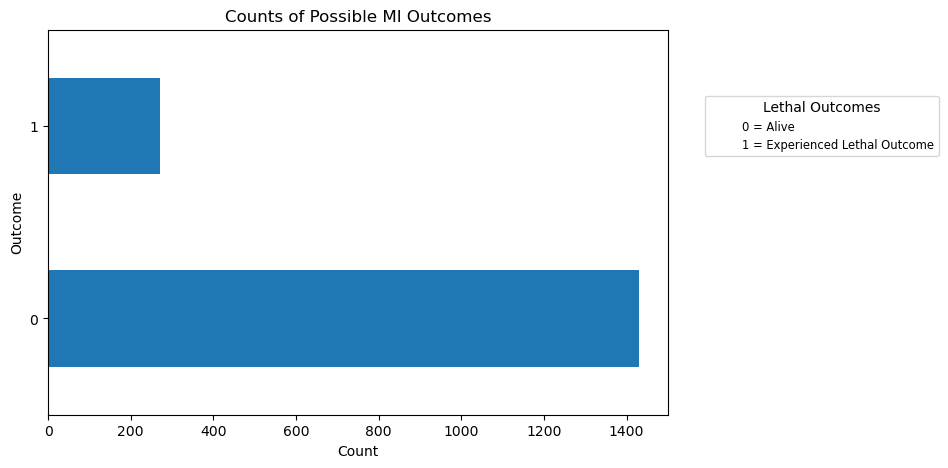

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,5))

df['LET_IS'].value_counts().plot.barh()

plt.title('Counts of Possible MI Outcomes')
plt.ylabel('Outcome')
plt.xlabel('Count')

# Manually add a legend without colors
labels = ['0 = Alive', '1 = Experienced Lethal Outcome']
handles = [plt.Line2D([0], [0], lw=0)] * len(labels)  # Empty lines (no color)
plt.legend(loc=6, bbox_to_anchor=(1.05, 0.75), title= "Lethal Outcomes", handles=handles, labels=labels, fontsize="small")

# Save and show the figure
plt.savefig('../figures/EDA/count_lethal_outcome.png', dpi=300, bbox_inches='tight')
plt.savefig('../figures/presentation/count_lethal_outcome.png', dpi=300, bbox_inches='tight')
plt.show()

**Figure 1.** There is significant imbalance of classes, with 84.06% of points labeled as "alive/healthy" (0) and the remaining 15.94% experiencing a lethal outcome.

**Q7** Create as many figures you can to better understand your dataset and calculate summary statistics as well.

First, I'd like to handle the missing values of the categorical and ordinal features. To do this, I will just manually add another category/order that stands for missing/unknown outcomes. I handle the continuous variables using the reduced-features model in my actual ML pipeline.

In [13]:
# Generate additional categories for missing values of each category
add_2_as_unknown = [
    'SIM_GIPERT', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08',
    'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01',
    'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03',
    'zab_leg_04', 'zab_leg_06', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST',
    'SVT_POST', 'GT_POST', 'FIB_G_POST', 'IM_PG_P', 'ritm_ecg_p_01',
    'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07',
    'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03',
    'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08',
    'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03',
    'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07',
    'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11',
    'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03',
    'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K',
    'GIPER_NA', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'LID_S_n',
    'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n',
    'TRENT_S_n'
]
add_3_as_unknown = ['IBS_POST']
add_4_as_unknown = ['INF_ANAM', 'GB', 'R_AB_1_n']
add_5_as_unknown = ['FK_STENOK', 'ZSN_A', 'NA_R_1_n', 'NOT_NA_1_n', 'ant_im', 'lat_im', 'inf_im', 'post_im']
add_7_as_unknown = ['STENOK_AN']
add_8_as_unknown = ['DLIT_AG']
add_10_as_unknown = ['TIME_B_S']

# Fill in with new "unknown" categories represented by an unused integer for the categorical data
df[add_2_as_unknown] = df[add_2_as_unknown].fillna(2)
df[add_3_as_unknown] = df[add_3_as_unknown].fillna(3)
df[add_4_as_unknown] = df[add_4_as_unknown].fillna(4)
df[add_5_as_unknown] = df[add_5_as_unknown].fillna(5)
df[add_7_as_unknown] = df[add_7_as_unknown].fillna(7)
df[add_8_as_unknown] = df[add_8_as_unknown].fillna(8)
df[add_10_as_unknown] = df[add_10_as_unknown].fillna(10)

# Recalculate missing percentages after handling categorical and ordinal features
# missing_percentage = df.isna().mean() * 100
# missing_percentage_sorted = missing_percentage.sort_values(ascending=True)
# print("Missing values percentage per column:")
# print(missing_percentage_sorted)

In [14]:
# EDA Visualization of each feature
df_whole = df.copy()
y = df['LET_IS']
X = df.drop(columns=['LET_IS'])

categories = y.unique()
all_features = X.columns.tolist()
continuous_features = ['AGE', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'K_BLOOD', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'L_BLOOD', 'ROE']
ordinal_features = [
    'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'GB', 'DLIT_AG', 
    'ZSN_A', 'TIME_B_S', 'R_AB_1_n', 'NA_R_1_n', 'NOT_NA_1_n'
]
categorical_features = list(set(all_features) - set(continuous_features) - set(ordinal_features))

# Define separate color palettes and labels
categorical_colors = ['#1f77b4', '#ff7f0e']  # For categorical features
ordinal_colors = ['#4a86e8ff', '#ffab40ff']  # For ordinal features (updated)
units = ['years', 'mmHg', 'mmHg', 'mmHg', 'mmHg', 'mmol/L', 'mmol/L', 'IU/L', 'IU/L', 'billions per liter', 'mm']
labels = ['0 = Alive', '1 = Experienced Lethal Outcome']

# print("CATEGORICAL FEATURES")
# for categorical_ftr in categorical_features:
#     count_matrix = df_whole.groupby([categorical_ftr, 'LET_IS']).size().unstack()
#     count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1), axis=0)
    
#     count_matrix_norm.plot(kind='bar', stacked=True, figsize=(10, 6), color=categorical_colors[:count_matrix.shape[1]])
    
#     plt.legend(loc=6, bbox_to_anchor=(1.05, 0.75), title='Possible Outcomes Post-MI', borderaxespad=0., labels=labels, fontsize="small")  # Adjust legend outside
    
#     plt.title(f'{categorical_ftr} vs. possible outcomes post-MI')
#     plt.ylabel('Fraction of outcomes')
#     plt.xticks(rotation=0)
    
#     plt.savefig(f'../figures/EDA/categorical features/{categorical_ftr} vs. possible outcomes post-MI.png', dpi=300, bbox_inches='tight')
#     plt.tight_layout()  
#     plt.show()
    
# print("\n")
# print("ORDINAL FEATURES")
# for ordinal_ftr in ordinal_features:
#     count_matrix = df_whole.groupby([ordinal_ftr, 'LET_IS']).size().unstack()
#     count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1), axis=0)
    
#     count_matrix_norm.plot(kind='bar', stacked=True, figsize=(10, 6), color=ordinal_colors[:count_matrix.shape[1]])
    
#     plt.legend(loc=6, bbox_to_anchor=(1.05, 0.75), title='Possible Outcomes Post-MI', borderaxespad=0., labels=labels, fontsize="small")  # Adjust legend outside
    
#     plt.title(f'{ordinal_ftr} vs. possible outcomes post-MI')
#     plt.ylabel('Fraction of outcomes')
#     plt.xticks(rotation=0)
    
#     plt.savefig(f'../figures/EDA/ordinal features/{ordinal_ftr} vs. possible outcomes post-MI.png', dpi=300, bbox_inches='tight')
#     plt.tight_layout()  
#     plt.show()

# print("\n")
# print("CONTINUOUS FEATURES: CATEGORY-SPECIFIC HISTOGRAM")
# for i, continuous_ftr in enumerate(continuous_features):
#     plt.figure(figsize=(10,6))
    
#     bin_range = (df_whole[continuous_ftr].min(), df_whole[continuous_ftr].max())
#     for c in categories:
#         plt.hist(df_whole[df_whole['LET_IS']==c][continuous_ftr], alpha=0.5, label=c, range=bin_range,bins=20, density=True)
        
#     plt.legend(loc=6, bbox_to_anchor=(1.05, 0.75), title='Possible Outcomes Post-MI', labels=labels, fontsize="small")
#     plt.suptitle('') # that's what you're after
#     plt.title(f'{continuous_ftr} vs. possible outcomes post-MI')
#     plt.ylabel('Fraction of outcomes')
#     plt.xlabel(f'{continuous_ftr} ({units[i]})')
    
#     plt.savefig(f'../figures/EDA/continuous features/{continuous_ftr} vs. possible outcomes post-MI (category-specific histogram).png', dpi=300, bbox_inches='tight')
#     plt.tight_layout()
#     plt.show() 
    
# print("\n")
# print("CONTINUOUS FEATURES: BOX-PLOT")
# for i, continuous_ftr in enumerate(continuous_features):
#     df_whole[[continuous_ftr, 'LET_IS']].boxplot(by='LET_IS', figsize=(7,5))
    
#     plt.suptitle('') # that's what you're after
#     plt.title(f'{continuous_ftr} vs. possible outcomes post-MI')
#     plt.xlabel('Outcomes')
#     plt.ylabel(f'{continuous_ftr} ({units[i]})')
#     handles = [plt.Line2D([0], [0], lw=0)] * len(labels)  # Empty lines (no color)
#     plt.legend(loc=6, bbox_to_anchor=(1.05, 0.75), title='Possible Outcomes Post-MI', handles=handles, labels=labels, fontsize="small")
    
#     plt.savefig(f'../figures/EDA/continuous features/{continuous_ftr} vs. possible outcomes post-MI (box plot).png', dpi=300, bbox_inches='tight')
#     plt.show()

**Q8** Choose some figures to show in your presentation/report and explain why you chose them. 

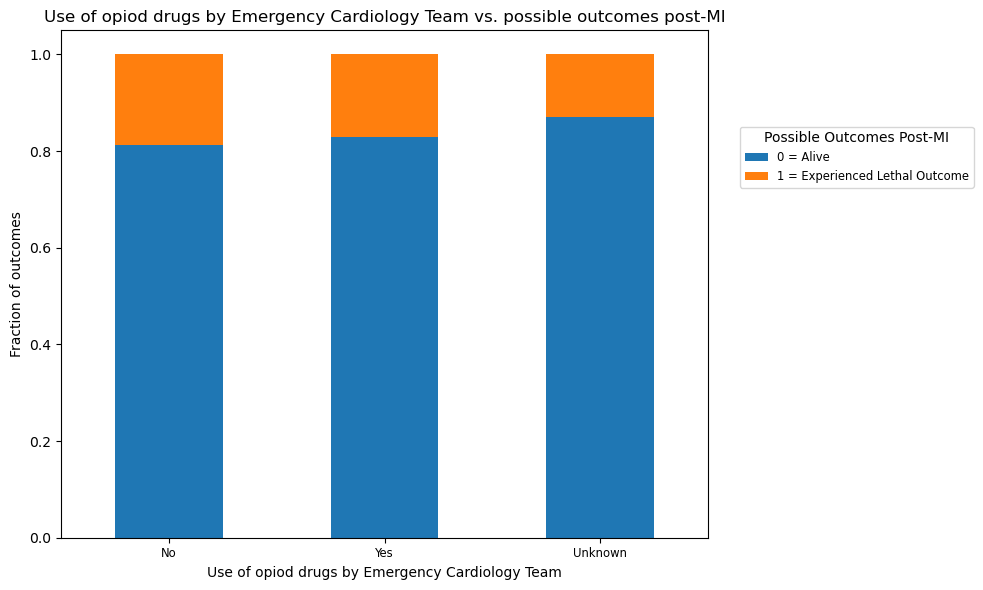

In [18]:
# 1. Categorical: NA_KB (use of opiod drugs) vs target variable
count_matrix = df_whole.groupby(['NA_KB', 'LET_IS']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1), axis=0)
    
count_matrix_norm.plot(kind='bar', stacked=True, figsize=(10, 6), color=categorical_colors[:count_matrix.shape[1]])
    
plt.legend(loc=6, bbox_to_anchor=(1.05, 0.75), title='Possible Outcomes Post-MI', borderaxespad=0., labels=labels, fontsize="small")  # Adjust legend outside
plt.title(f'Use of opiod drugs by Emergency Cardiology Team vs. possible outcomes post-MI')
plt.ylabel('Fraction of outcomes')
plt.xlabel('Use of opiod drugs by Emergency Cardiology Team')
plt.xticks(ticks=range(len(count_matrix_norm.index)), labels=["No", "Yes", "Unknown"], rotation=0, fontsize='small')
    
# Adjust layout to ensure everything fits
plt.savefig(f'../figures/presentation/NA_KB vs. possible outcomes post-MI.png', dpi=300, bbox_inches='tight')
plt.tight_layout()  
plt.show()

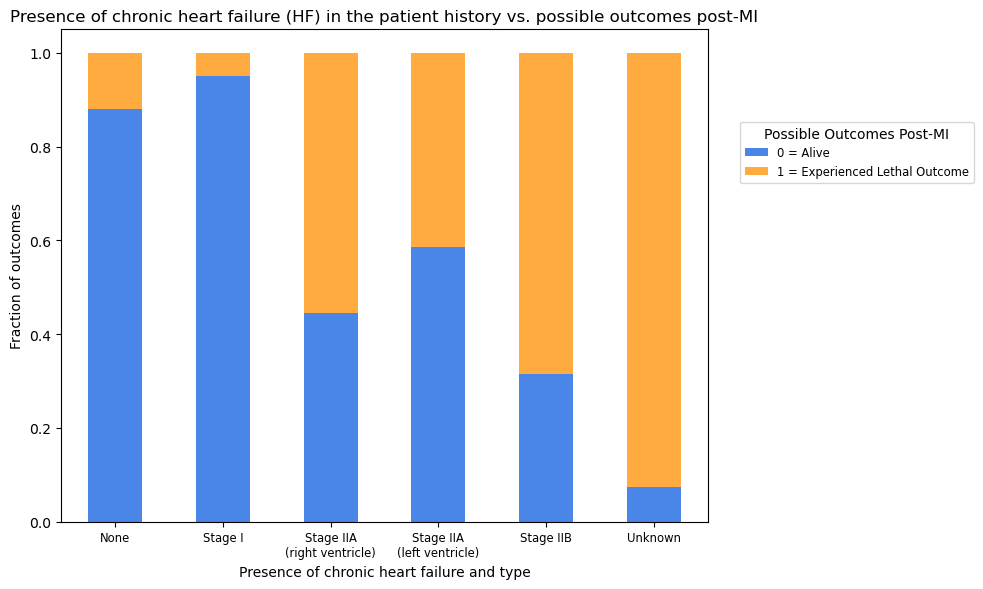

In [16]:
# 2. Ordinal: ZSN_A (chronic heart failure history) vs target variable
count_matrix = df_whole.groupby(['ZSN_A', 'LET_IS']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1), axis=0)
count_matrix_norm.plot(kind='bar', stacked=True, figsize=(10, 6), color=ordinal_colors[:count_matrix.shape[1]])
    
plt.legend(loc=6, bbox_to_anchor=(1.05, 0.75), title='Possible Outcomes Post-MI', borderaxespad=0., labels=labels, fontsize="small")  # Adjust legend outside
plt.title(f'Presence of chronic heart failure (HF) in the patient history vs. possible outcomes post-MI')
plt.ylabel('Fraction of outcomes')
plt.xlabel('Presence of chronic heart failure and type')
plt.xticks(ticks=range(len(count_matrix_norm.index)), labels=["None", "Stage I", "Stage IIA\n(right ventricle)", "Stage IIA\n(left ventricle)", "Stage IIB", "Unknown"], rotation=0, fontsize='small')
    
plt.savefig(f'../figures/presentation/ZSN_A vs. possible outcomes post-MI.png', dpi=300, bbox_inches='tight')
plt.tight_layout()  
plt.show()

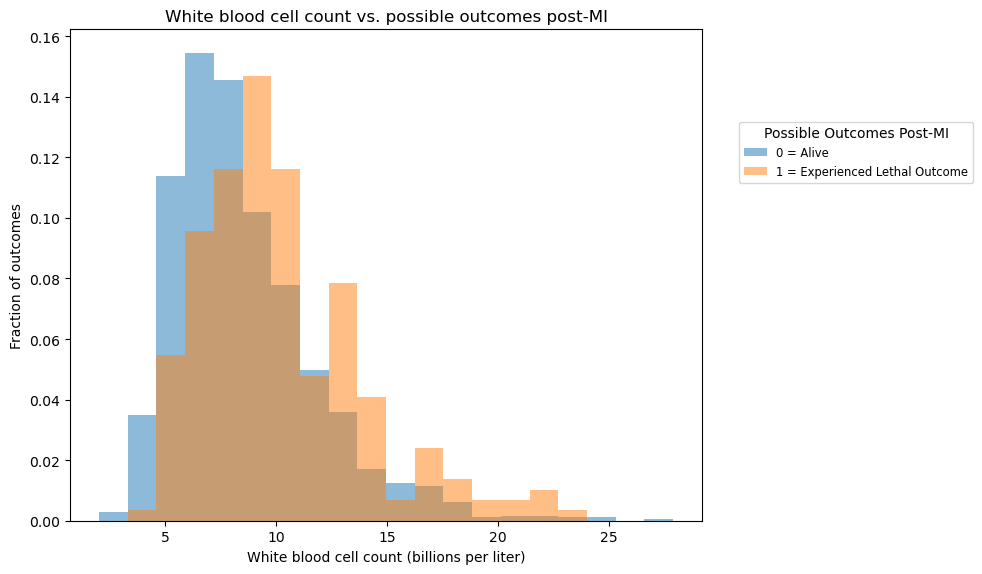

In [88]:
# 3. Continuous: L_BLOOD (white blood cell count) vs target variable
plt.figure(figsize=(10,6))

bin_range = (df_whole['L_BLOOD'].min(), df_whole['L_BLOOD'].max())
for c in categories:
    plt.hist(df_whole[df_whole['LET_IS']==c]['L_BLOOD'], alpha=0.5, label=c, range=bin_range,bins=20, density=True)
    
plt.legend(loc=6, bbox_to_anchor=(1.05, 0.75), title="Possible Outcomes Post-MI", labels=labels, fontsize="small")
plt.suptitle('')
plt.title(f'White blood cell count vs. possible outcomes post-MI')
plt.ylabel('Fraction of outcomes')
plt.xlabel(f'White blood cell count (billions per liter)')

plt.savefig(f'../figures/presentation/L_BLOOD vs. possible outcomes post-MI.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show() 

Notes:
- we haven't handled missing values in the continuous features
- histograms and box plots directly handle missing values in these features by either excluding/ignoring NaN values automatically from the data being plotted
- the missing values of the continuous features may yield inaccurate/incomplete visualiations (but this gives us good initial insight into the distribution of the data)

**Q9** Observe feature relationships (Pearson correlation).

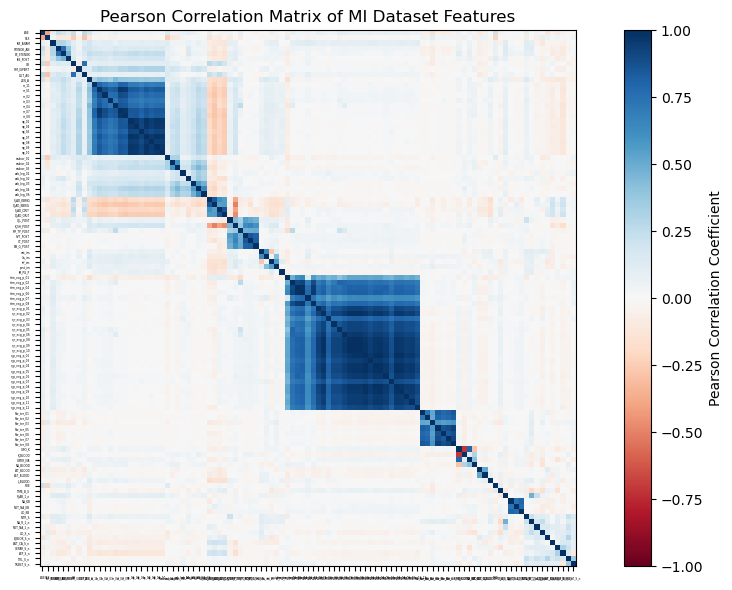

In [89]:
plt.figure(figsize=(10,6))
pearson_corr = X.corr(method='pearson')

plt.imshow(pearson_corr, cmap='RdBu', vmin=-1, vmax=1) # coefficient is between -1 and 1

plt.yticks(ticks=np.arange(len(X.columns)), labels=X.columns, fontsize=2)
plt.xticks(ticks=np.arange(len(X.columns)), labels=X.columns, fontsize=2)

plt.colorbar(label='Pearson Correlation Coefficient')
plt.title('Pearson Correlation Matrix of MI Dataset Features')

plt.savefig(f'../figures/presentation/Original Pearson Correlation Matrix of MI Dataset Features.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

Based on this information about feature correlation, we can see that many features are highly correlated with each other. This indicates that we can drop some features to reduce the complexity of the model (thus reduce the risk of overfitting). I chose a threshold of 85% correlation to indicate whether I would drop a feature in a correlation pair or not. 


In [90]:
pearson_corr = X.corr(method='pearson')

threshold = 0.85

high_corr_pairs = []

for i in range(len(pearson_corr.columns)):
    for j in range(i):
        if abs(pearson_corr.iloc[i, j]) > threshold:
            feature_pair = tuple(sorted([pearson_corr.columns[i], pearson_corr.columns[j]]))
            high_corr_pairs.append((feature_pair[0], feature_pair[1], pearson_corr.iloc[i, j]))

# Print out the pairs and their correlation values
print("Correlation pairs of over 85%:")
for pair in high_corr_pairs:
    print(f'Features: {pair[0]} and {pair[1]} | Correlation: {pair[2]:.2f}')

Correlation pairs of over 85%:
Features: nr_01 and nr_02 | Correlation: 0.88
Features: nr_01 and nr_07 | Correlation: 0.97
Features: nr_02 and nr_07 | Correlation: 0.90
Features: nr_04 and nr_07 | Correlation: 0.86
Features: nr_01 and nr_08 | Correlation: 0.95
Features: nr_02 and nr_08 | Correlation: 0.88
Features: nr_07 and nr_08 | Correlation: 0.97
Features: np_01 and nr_07 | Correlation: 0.86
Features: np_01 and np_04 | Correlation: 0.97
Features: np_01 and np_05 | Correlation: 0.92
Features: np_04 and np_05 | Correlation: 0.91
Features: np_07 and nr_07 | Correlation: 0.86
Features: np_01 and np_07 | Correlation: 0.98
Features: np_04 and np_07 | Correlation: 0.97
Features: np_05 and np_07 | Correlation: 0.92
Features: np_01 and np_08 | Correlation: 0.95
Features: np_04 and np_08 | Correlation: 0.94
Features: np_05 and np_08 | Correlation: 0.89
Features: np_07 and np_08 | Correlation: 0.95
Features: np_09 and nr_07 | Correlation: 0.86
Features: np_01 and np_09 | Correlation: 0.97
Fea

In [91]:
over_85 = ['D_AD_ORIT', 'GT_POST']
# print(len(over_85))
X = X.drop(columns=over_85) # drop columns with over 80% missing values

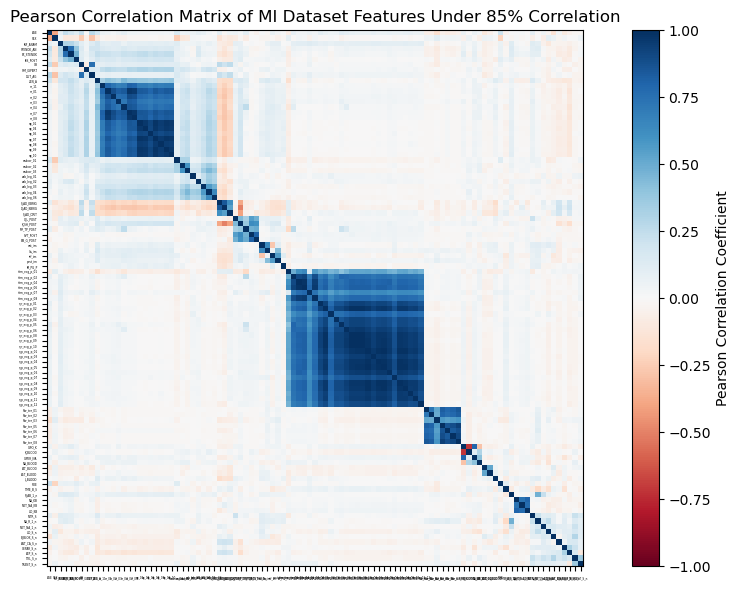

In [95]:
plt.figure(figsize=(10,6))
pearson_corr = X.corr(method='pearson')

plt.imshow(pearson_corr, cmap='RdBu', vmin=-1, vmax=1) # coefficient is between -1 and 1

plt.yticks(ticks=np.arange(len(X.columns)), labels=X.columns, fontsize=2)
plt.xticks(ticks=np.arange(len(X.columns)), labels=X.columns, fontsize=2)

plt.colorbar(label='Pearson Correlation Coefficient')
plt.title('Pearson Correlation Matrix of MI Dataset Features Under 85% Correlation')

plt.savefig(f'../figures/presentation/Pearson Correlation Matrix of MI Dataset Features Under 85% Correlation.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

By this point, I have removed these columns from the original dataset:
1. The "ID" column (1)
2. Time-specific features advised by dataset authors: R_AB_2_n, R_AB_3_n, NA_R_2_n, NA_R_3_n, NOT_NA_2_n, and NOT_NA_3_n (6)
3. Unused target variables (11)
4. Columns with over 80% values missing: IBS_NASL, KFK_BLOOD (2)
5. "LET_IS" target variable (1)
6. Continuous features that have over 85% correlation: 'D_AD_ORIT' (1)

**In total, 22 columns are removed.** So there are 124 - 22 = 102 columns left. I can revisit if some of these columns should be added back as I train my model. 

# METHODS
## Split the data into different sets

**Q1** How would you split this data and why?

We have ruled out that this data is not non-iid, given that it has no group (patients only appear once in the dataset) nor a time-series structure (there is not data taken at different time points, given we have focused on a specific time point of patient data taken).  
Knowing this, I will choose to use **stratified KFold splitting** since the target variable I am dealing with is significantly imbalanced, this is a classification problem, and KFold enables a more robust approach in evaluating how well my model performs.  
I will ensure my splits are reproducible by using a constant set of some number of random states as the seed. You can see how I split the data in my actual ML pipeline.

## Preprocess the data

**Q1** What preprocessors will you use and why?

For categorical features, I will use OneHotEncoder. OneHotEncoder creates binary columns for each category, which is useful for nominal data where categories don’t have an intrinsic order (helps avoid misleading interpretations from label encoding). For continuous features, I will use both MinMaxScaler and StandardScaler since the continuous features (e.g., age, blood test results) have different ranges and units. I determined which scaler to use for each continuous feature by looking at the distribution of data from my EDA visualizations and decide which features appear to have significant outliers (which I would use StandardScaler for) and which do not/have definitive ranges (which I would use MinMaxScaler for). The ordinal features are already numerical and have an instrinsic order, so I don't have to encode them.  
Lastly, I will apply StandardScaler to **all** of the features after preprocessing, since it's good practice to scale all features to have a mean of 0 and a standard deviation of 1 (according to Professor Zsom). 

## Choose an evaluation metric
This depends on the priorities of the stakeholders, requires some thinking and ethical considerations. I am dealing with a classifcation problem, meaning our options for evaluation metrics include:

1. Accuracy - Proportion of correctly predicted outcomes across all classes (misleading if data is imbalanced)
2. Recall - proportion of lethal outcomes correctly identitifed out of all actual lethal outcomes (ensures fewer critical cases are overlooked)
3. Precision - proportion of correctly predicted lethal outcomes out of all cases predicted as lethal (ensures actionable predictions are reliable)
4. Specificity - proportion of true negatives correctly identified (over-predicting lethal outcomes can lead to unnecessary interventions)
5. FBeta Score - harmonic mean of precision and recall (provides balance when cost of false positives and false negatives is comparable)
6. ROC - measures trade-offs between tpr and fpr for each class (gives insight into how well the model distinguishes between classes)
7. Logloss - measures uncertainty of model's predictions by comparing predicted probabilities against true class (penalizes predictions that are confident but incorrect)

### Stakeholder and ethical considerations
#### Imbalanced data
As depicted in our visualization of the target variable distribution, lethal outcomes make up a small proportion (around 20%). Thus, metrics that do not rely on true negatives (like accuracy) are best. More specifically, fbeta and perhaps averaging methods of fbeta would be best suited since they directly account for class imbalance.
#### Stakeholder priorities
Considering this would be used as a medical diagnostic tool, it appears that recall would be the metric prioritized here because false negatives (failing to identify a lethal outcome) tend to have far more serious consequences than false positives (incorrectly flagging a healthy patient with a lethal outcome). So I would choose a beta value of 2 for this problem (to prioritize recall).

## Choose one or more ML techniques
Try at least four different ML algorithms we covered in class on your dataset and at least two of those models should be non-linear.
We are working with a classification problem in which our dataset has missing values in our continuous feature variables, meaning our options are:
1. Reduced feature SVM rbf classification (nonlinear) - good for small to medium-sized datasets
2. Reduced feature random forest classification (nonlinear) - robust to overfitting with enough trees, good interpretability
3. Reduced feature logistic regression (linear) -  easy to interpret and computationally efficient
4. Reduced feature KNN (nonlinear) - works well for small datasets, easy to implement

### Algorithms

#### Logistic Regression

In [99]:
from sklearn.metrics import log_loss, fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

def log_reg_l1(X_other, y_other, kf, random_state):
    """
    Fits a Logistic Regression model with L1 regularization using GridSearchCV 
    for hyperparameter tuning and evaluates it with a custom F2 scorer.
    
    Parameters:
        - X_other (array-like): Feature matrix for the training data.
        - y_other (array-like): Target variable for the training data.
        - kf (int or cross-validation generator): Number of folds or an actual CV splitter for cross-validation.
        - random_state (int): Random state for reproducibility.
    
    Returns:
        - grid_search (GridSearchCV object): Trained GridSearchCV object with the best model and parameters.
    """

    # Hyperparameters
    param_grid = {
        "C": 1 / np.logspace(-2, 2, 10),  # Convert alpha to C (C = 1/alpha)
        "solver": ["saga"],  # Saga solver supports L1 regularization
        "penalty": ["l1"],  # L1 regularization
        "max_iter": [10000],  # Ensure convergence
        "tol": [1e-4]
    }
    
    # Custom f2 scorer
    fbeta_scorer = make_scorer(fbeta_score, beta=2)
    
    # Initialize model
    model = LogisticRegression(random_state=random_state)
    
    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring=fbeta_scorer,
        cv=kf,  # 3-fold cross-validation
        verbose=1,
    )

    # Fit the model
    grid_search.fit(X_other, y_other)
    print("Best parameters for logreg l1:")
    print(grid_search.best_params_)

    return grid_search

def log_reg_l2(X_other, y_other, kf, random_state):
    """
    Fits a Logistic Regression model with L2 regularization using GridSearchCV 
    for hyperparameter tuning and evaluates it with a custom F2 scorer.
    
    Parameters:
        - X_other (array-like): Feature matrix for the training data.
        - y_other (array-like): Target variable for the training data.
        - kf (int or cross-validation generator): Number of folds or an actual CV splitter for cross-validation.
        - random_state (int): Random state for reproducibility.
    
    Returns:
        - grid_search (GridSearchCV object): Trained GridSearchCV object with the best model and parameters.
    """
    
    # Hyperparameters
    param_grid = {
        "C": 1 / np.logspace(-2, 2, 10),  # Convert alpha to C (C = 1/alpha)
        "solver": ["saga"],  # Saga solver supports L2 regularization
        "penalty": ["l2"],  # L2 regularization
        "max_iter": [10000],  # Ensure convergence
        "tol": [1e-4]
    }

    # Custom f2 scorer
    fbeta_scorer = make_scorer(fbeta_score, beta=2)
    
    # Initialize model
    model = LogisticRegression(random_state=random_state)

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring=fbeta_scorer,
        cv=kf,  # 3-fold cross-validation
        verbose=1,
    )

    # Fit the model
    grid_search.fit(X_other, y_other)
    print("Best parameters for logreg l2:")
    print(grid_search.best_params_)

    return grid_search

#### Random Forest Classification

In [100]:
from sklearn.ensemble import RandomForestClassifier
def random_forest(X_other, y_other, kf, random_state):
    """
    Fits a Random Forest Classifier using GridSearchCV for hyperparameter tuning 
    and evaluates it with a custom F2 scorer.
    
    Parameters:
        - X_other (array-like): Feature matrix for the training data.
        - y_other (array-like): Target variable for the training data.
        - kf (int or cross-validation generator): Number of folds or an actual CV splitter for cross-validation.
        - random_state (int): Random state for reproducibility.
    
    Returns:
        - grid_search (GridSearchCV object): Trained GridSearchCV object containing the best model and parameters.
    """

    # Hyperparameters
    param_grid = {
        "max_depth": [1, 3, 10, 30, 100],
        "max_features": [0.5, 0.75, 1.0]
    }

    # Custom f2 scorer
    fbeta_scorer = make_scorer(fbeta_score, beta=2)

    # Initialize model 
    model = RandomForestClassifier(random_state = random_state)

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring=fbeta_scorer,
        cv=kf,  # 3-fold cross-validation
        verbose=1,
    )

    # Fit the model
    grid_search.fit(X_other, y_other)
    print("Best parameters for random forest classification:")
    print(grid_search.best_params_)

    return grid_search

#### KNN classification

In [101]:
from sklearn.neighbors import KNeighborsClassifier
def knn(X_other, y_other, kf, random_state):
    """
    Fits a K-Nearest Neighbors (KNN) Classifier using GridSearchCV for hyperparameter tuning 
    and evaluates it with a custom F2 scorer.
    
    Parameters:
        - X_other (array-like): Feature matrix for the training data.
        - y_other (array-like): Target variable for the training data.
        - kf (int or cross-validation generator): Number of folds or an actual CV splitter for cross-validation.
        - random_state (int): Random state (unused in KNN but included for consistency with other functions).
    
    Returns:
        - grid_search (GridSearchCV object): Trained GridSearchCV object containing the best model and parameters.
    """

    # Hyperparameters
    param_grid = {
        "n_neighbors": [1, 3, 10, 30, 100],
        "weights": ["uniform", "distance"]
    }

    # Custom f2 scorer
    fbeta_scorer = make_scorer(fbeta_score, beta=2)

    # Initialize model 
    model = KNeighborsClassifier()

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring=fbeta_scorer,
        cv=kf,  # 3-fold cross-validation
        verbose=1,
    )

    # Fit the model
    grid_search.fit(X_other, y_other)
    print("Best parameters for knn classification:")
    print(grid_search.best_params_)

    return grid_search

#### SVM classification

In [102]:
from sklearn.svm import SVC
def svc(X_other, y_other, kf, random_state):
    """
    Fits a Support Vector Classifier (SVC) using GridSearchCV for hyperparameter tuning 
    and evaluates it with a custom F2 scorer.
    
    Parameters:
        - X_other (array-like): Feature matrix for the training data.
        - y_other (array-like): Target variable for the training data.
        - kf (int or cross-validation generator): Number of folds or an actual CV splitter for cross-validation.
        - random_state (int): Random state for reproducibility.
    
    Returns:
        - grid_search (GridSearchCV object): Trained GridSearchCV object containing the best model and parameters.
    """

    # Hyperparameters
    param_grid = {
        "gamma": [1e-3, 1e-1, 1e1, 1e3, 1e5],
        "C": [1e-2, 1e-1, 1e0, 1e1, 1e2]
    }

    # Custom f2 scorer
    fbeta_scorer = make_scorer(fbeta_score, beta=2)
    
    # Initialize model
    model = SVC(random_state = random_state)

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring=fbeta_scorer,
        cv=kf,  # 3-fold cross-validation
        verbose=1,
    )

    # Fit the model
    grid_search.fit(X_other, y_other)
    print("Best parameters for SVM Classification:")
    print(grid_search.best_params_)

    return grid_search

### ML Pipeline Framework
For each algorithm:
1. For each random state:
    1. Extract test set (20%)
    2. Preprocess the splits
    3. Within reduced-features model:
        1. Train model on subset, conducting hyperparameter tuning to yield best model (GridSearchCV)
        2. Track models and f2 scores
    4. Return best model based on highest f2 score
2. Calculate the mean and standard deviation of f2 score

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import log_loss, fbeta_score

n_folds = 3

def ML_pipeline(algo, X, y, random_state):
    """
    Fits a machine learning model using a pipeline that preprocesses features and performs
    hyperparameter tuning using GridSearchCV, while evaluating performance based on F2 score.
    
    Parameters:
        - algo (function): A machine learning algorithm function (e.g., log_reg_l1, random_forest, etc.) 
                            that performs GridSearchCV and returns a fitted model.
        - X (DataFrame): Feature matrix for the dataset.
        - y (Series): Target variable for the dataset.
        - random_state (int): Random state for reproducibility of train-test split and cross-validation.
    
    Returns:
        - best_grid (GridSearchCV object): Best GridSearchCV object containing the best model and hyperparameters.
        - total_f2 (float): Overall F2 score (weighted) for the best model's predictions on the test set.
        - y_test (Series): True labels for the test set.
        - all_y_test_pred (Series): Predicted labels for the test set from the best model.
        - df_X_test (DataFrame): Preprocessed feature matrix for the test set.
        - feature_names (array): Names of the features used in the model after preprocessing.
    """
    
    # Create test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)

    # Stratified kfold for cross validation
    kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=random_state) 
    
    # Specify features for preprocessing
    all_ftrs = X.columns.tolist()
    ordinal_ftrs = ['INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'GB', 'DLIT_AG', 'ZSN_A', 'TIME_B_S', 'R_AB_1_n', 'NA_R_1_n', 'NOT_NA_1_n']
    minmax_ftrs = ["AGE", "S_AD_KBRIG", "S_AD_ORIT"] # minmax features: outliers are not as prominent and there is a defined range
    standard_ftrs = ["D_AD_KBRIG", "K_BLOOD", "NA_BLOOD", "ALT_BLOOD", "AST_BLOOD", "L_BLOOD", "ROE"] #standard features: outliers are significant and range is muddy
    onehot_ftrs = list(set(all_ftrs) - set(minmax_ftrs) - set(standard_ftrs) - set(ordinal_ftrs))

    # Collect all the encoders
    preprocessor = ColumnTransformer(
        transformers=[
            ('standard', StandardScaler(), standard_ftrs),  # Scale continuous features
            ('minmax', MinMaxScaler(), minmax_ftrs),
            ('onehot', OneHotEncoder(sparse_output=False, handle_unknown="ignore"), onehot_ftrs)
        ])

    # Scale all final features 
    final_scaler = StandardScaler()

    # Manually preprocess the splits
    # X_other
    print("X_other before preprocessing: ", X_other.shape)
    X_other_prep = preprocessor.fit_transform(X_other)
    X_other_scaled = final_scaler.fit_transform(X_other_prep)
    feature_names = preprocessor.get_feature_names_out()
    df_X_other = pd.DataFrame(data=X_other_scaled,columns=feature_names)
    print("X_other after preprocessing: ", df_X_other.shape)
    # X_test
    print("X_other before preprocessing: ", X_test.shape)
    X_test_prep = preprocessor.transform(X_test)
    X_test_scaled = final_scaler.transform(X_test_prep)
    df_X_test = pd.DataFrame(data=X_test_scaled, columns = feature_names)
    print("X_other after preprocessing: ", df_X_test.shape)

    # Reduced-Features Model
    mask = df_X_test.isnull()
    unique_rows = np.array(np.unique(mask, axis=0))
    all_y_test_pred = pd.DataFrame()
    
    # Store models and predictions for each unique missing value pattern
    i_grids = [] 
    i_f2_scores = []
    for i in range(len(unique_rows)):
        # generate X_test subset that matches the unique pattern i
        sub_X_test = pd.DataFrame()
        sub_y_test = pd.Series(dtype=float)
        for j in range(len(mask)): # check each row in mask
            row_mask = np.array(mask.iloc[j])
            if np.array_equal(row_mask, unique_rows[i]): # if the pattern matches the ith unique pattern

                sub_X_test = pd.concat([sub_X_test, df_X_test.iloc[[j]]]) # append the according X_test row j to the subset
                if not y_test.iloc[[j]].empty:
                    sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])

        sub_X_test = sub_X_test[df_X_test.columns[~unique_rows[i]]]
        
        # choose the according reduced features for subgroups
        sub_X_other = pd.DataFrame()
        sub_y_other = pd.DataFrame()
        # 1. cut the feature columns that have nans in the according sub_X_test
        sub_X_other = df_X_other[df_X_other.columns[~unique_rows[i]]]
        # 2. cut the rows in the sub_X_train and sub_X_CV that have any nans
        sub_X_other = sub_X_other.dropna()
        # 3. cut the sub_y_train and sub_y_CV accordingly
        sub_y_other = y_other.iloc[sub_X_other.index]

        if sub_X_other.empty or sub_y_other.empty:
            continue # Skip this unique pattern

        # Find best model of this subset
        grid = algo(sub_X_other, sub_y_other, kf, random_state)
        best_model = grid.best_estimator_

        # Make predictions on the test set (sub_X_test) using the best model
        sub_y_test_pred = best_model.predict(sub_X_test)

        # Collect the predicted labels for comparison
        sub_y_test_pred_df = pd.Series(sub_y_test_pred)
        all_y_test_pred = pd.concat([all_y_test_pred, sub_y_test_pred_df])

        # Track the grids and associated scores
        i_grids.append(grid)
        i_f2_scores.append(fbeta_score(sub_y_test, sub_y_test_pred, beta=2, average='weighted'))
        
    # Get the best model overall based on f2
    best_grid_index = np.argmax(i_f2_scores)
    best_grid_overall = i_grids[best_grid_index]

    # Rank the final predicted probabilities according to the original y_test index
    all_y_test_pred = all_y_test_pred.sort_index()
    y_test = y_test.sort_index()
    X_test = X_test.sort_index()
    
    # Get scores
    total_f2 = fbeta_score(y_test, all_y_test_pred, beta=2, average='weighted')
    
    return grid, total_f2, y_test, all_y_test_pred, df_X_test, feature_names

# RESULTS

In [21]:
random_states = [0, 42, 100, 81, 9] # 5 different random states

In [22]:
import pickle

log_reg_l1_f2 = []
log_reg_l2_f2 = []
random_forest_f2 = []
knn_f2 = []
svc_f2 = []

for random_state in random_states:
    print(f'RANDOM STATE {random_state}')
    print("="*80)
    
    log_reg_l1_data = ML_pipeline(log_reg_l1, X, y, random_state)
    log_reg_l2_data = ML_pipeline(log_reg_l2, X, y, random_state)
    random_forest_data = ML_pipeline(random_forest, X, y, random_state)
    knn_data = ML_pipeline(knn, X, y, random_state)
    svc_data = ML_pipeline(svc, X, y, random_state)
    
    log_reg_l1_f2.append(log_reg_l1_data[1])
    log_reg_l2_f2.append(log_reg_l2_data[1])
    random_forest_f2.append(random_forest_data[1])
    knn_f2.append(knn_data[1])
    svc_f2.append(svc_data[1])

    # Save intermediate results to a file
    with open(f'../results/intermediate results/results_random_state_{random_state}.save', 'wb') as file:
        pickle.dump({
            'random_state': random_state,
            'log_reg_l1_f2': log_reg_l1_data,
            'log_reg_l2_f2': log_reg_l2_data,
            'random_forest_f2': random_forest_data,
            'knn_f2': knn_data,
            'svc_f2': svc_data
        }, file)

# Calculate results
log_reg_l1_f2_mean = np.mean(log_reg_l1_f2)
log_reg_l2_f2_mean = np.mean(log_reg_l2_f2)
random_forest_f2_mean = np.mean(random_forest_f2)
knn_f2_mean = np.mean(knn_f2)
svc_f2_mean = np.mean(svc_f2)

log_reg_l1_f2_std = np.std(log_reg_l1_f2)
log_reg_l2_f2_std = np.std(log_reg_l2_f2)
random_forest_f2_std = np.std(random_forest_f2)
knn_f2_std = np.std(knn_f2)
svc_f2_std = np.std(svc_f2)

# Save the final aggregated results to a file
with open('../results/final_results.save', 'wb') as file:
    pickle.dump({"algorithm": ["Logistic Regression (l1)", "Logistic Regression (l2)", "Random Forest", "KNN", "SVC"],
                 "mean": [log_reg_l1_f2_mean, log_reg_l2_f2_mean, random_forest_f2_mean, knn_f2_mean, svc_f2_mean],
                 "std": [log_reg_l1_f2_std, log_reg_l2_f2_std, random_forest_f2_std, knn_f2_std, svc_f2_std]}, 
                file)

RANDOM STATE 0


NameError: name 'ML_pipeline' is not defined

## Interpret your model

In [23]:
from sklearn.metrics import precision_score

def calculate_baseline(p, beta):
    """
    Calculates the baseline F2 score for a classification model given the precision (p) 
    and the chosen beta value.
    
    Parameters:
        - p (float): Precision of the model (the proportion of true positives out of predicted positives).
        - beta (float): The weight of recall in the F2 score. Beta determines how much recall is favored 
                        over precision. A higher beta gives more importance to recall.
    
    Returns:
        - baseline (float): The baseline F2 score calculated using the provided precision and beta.
    """

    beta_squared = beta**2
    return (((1+beta_squared) * p) / ((beta_squared * p) + 1))

# Calculate precision based on the minority class
n = len(y)
n1 = (y == 1).sum()
p = n1/n

# Determine baseline score
baseline_f2 = calculate_baseline(p, 2)
print("baseline f2: ", baseline_f2)

baseline f2:  0.48670977011494254


In [24]:
# Load the saved results
import pickle
with open('../results/final_results.save', 'rb') as file:
    final_results = pickle.load(file)
    
# Create a DataFrame from the loaded results
test_scores_df = pd.DataFrame({
    "Algorithm": final_results["algorithm"],
    "Mean F2 Score": final_results["mean"],
    "Standard Deviation": final_results["std"]
})

print("Results of Supervised ML Models Trained:")
display(test_scores_df)

for random_state in random_states:
    print(f'Random State {random_state}')
    with open(f'../results/intermediate results/results_random_state_{random_state}.save', 'rb') as file:
        result = pickle.load(file)
    print("Best parameters for log reg l1: ", result['log_reg_l1_f2'][0].best_params_)
    print("Best parameters for log reg l2: ", result['log_reg_l2_f2'][0].best_params_)
    print("Best parameters for random forest: ", result['random_forest_f2'][0].best_params_)
    print("Best parameters for knn: ", result['knn_f2'][0].best_params_)
    print("Best parameters for svc: ", result['svc_f2'][0].best_params_)
    print("="*80)

Results of Supervised ML Models Trained:


,Algorithm,Mean F2 Score,Standard Deviation
0,Logistic Regression (l1),0.736800,0.016355
1,Logistic Regression (l2),0.738319,0.020928
2,Random Forest,0.779681,0.007495
3,KNN,0.760406,0.005996
4,SVC,0.752700,0.008754


Random State 0
Best parameters for log reg l1:  {'C': 35.938136638046274, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.0001}
Best parameters for log reg l2:  {'C': 12.91549665014884, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.0001}
Best parameters for random forest:  {'max_depth': 30, 'max_features': 0.75}
Best parameters for knn:  {'n_neighbors': 1, 'weights': 'uniform'}
Best parameters for svc:  {'C': 100.0, 'gamma': 0.001}
Random State 42
Best parameters for log reg l1:  {'C': 4.641588833612779, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.0001}
Best parameters for log reg l2:  {'C': 0.5994842503189408, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.0001}
Best parameters for random forest:  {'max_depth': 30, 'max_features': 0.5}
Best parameters for knn:  {'n_neighbors': 1, 'weights': 'uniform'}
Best parameters for svc:  {'C': 100.0, 'gamma': 0.001}
Random State 100
Best parameters for log reg l1:  {'C': 4.641588

In [30]:
num_stds = []

for i, std in enumerate(final_results["std"]):
    model_perf = final_results["mean"][i]
    num_std = (model_perf - baseline_f2) / std
    num_stds.append(num_std)

print(num_stds)

[15.291049738057716, 12.022499145618186, 39.08809180546555, 45.64453554287755, 30.385359993418547]


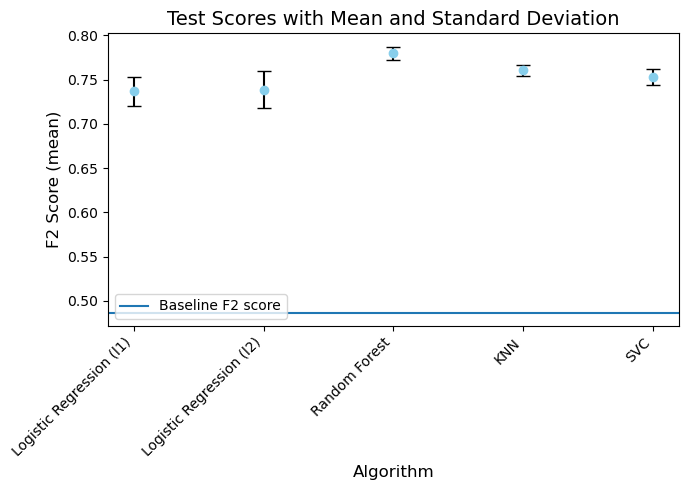

In [31]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(7, 5))

# Plot means with error bars representing the standard deviation
plt.errorbar(test_scores_df['Algorithm'], test_scores_df['Mean F2 Score'], yerr=test_scores_df['Standard Deviation'], capsize=5, fmt="o", color='skyblue', ecolor='black')

# Set labels and title
plt.xlabel('Algorithm', fontsize=12)
plt.ylabel('F2 Score (mean)', fontsize=12)
plt.title('Test Scores with Mean and Standard Deviation', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.axhline(baseline_f2,label='Baseline F2 score')
plt.legend(loc='lower left')

# Display the plot
plt.savefig(f'../figures/models/Algorithm f2 score results.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

### Confusion matrices

<Figure size 600x400 with 0 Axes>

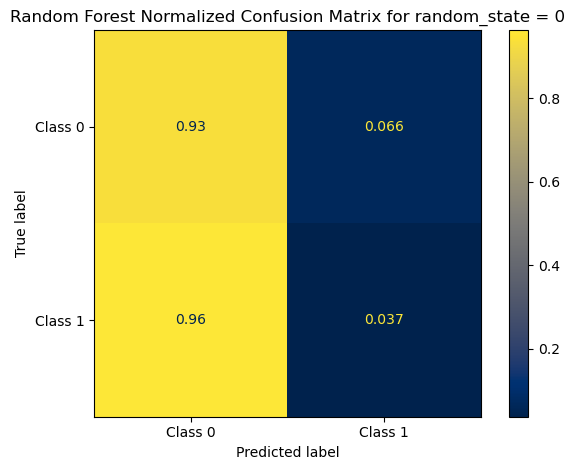

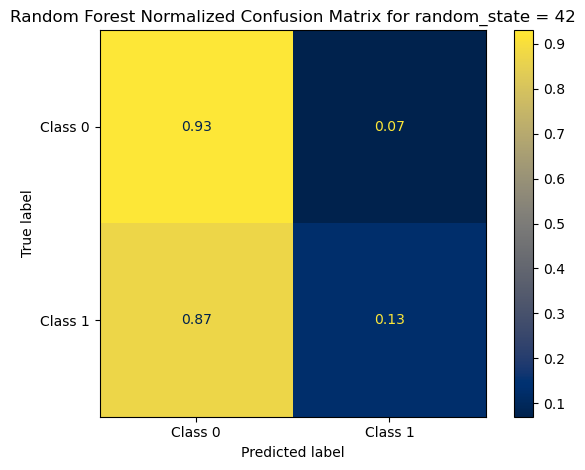

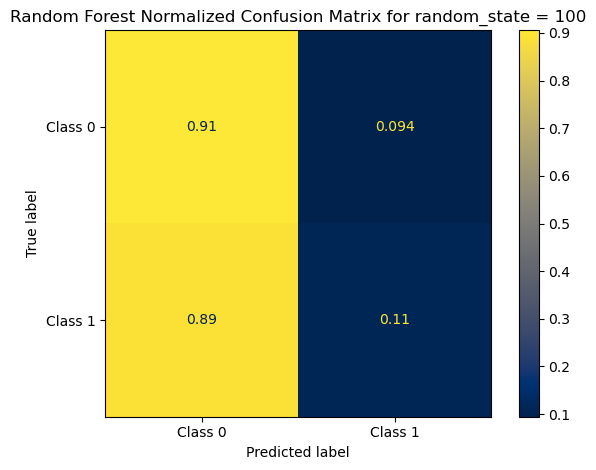

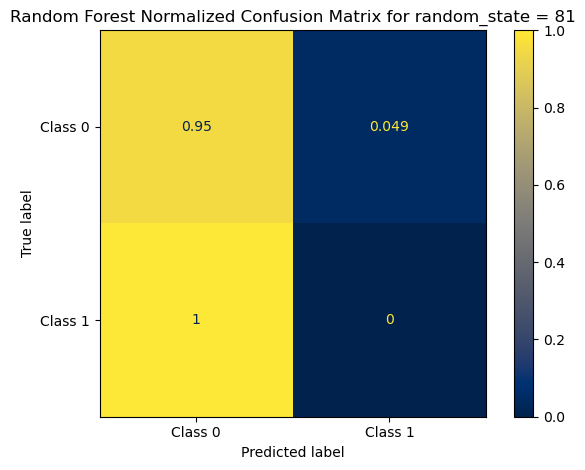

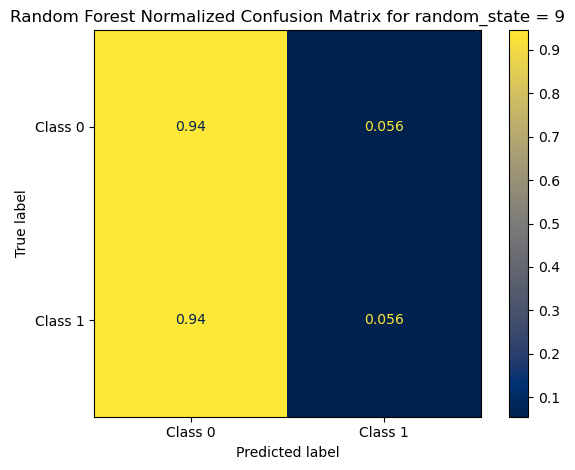

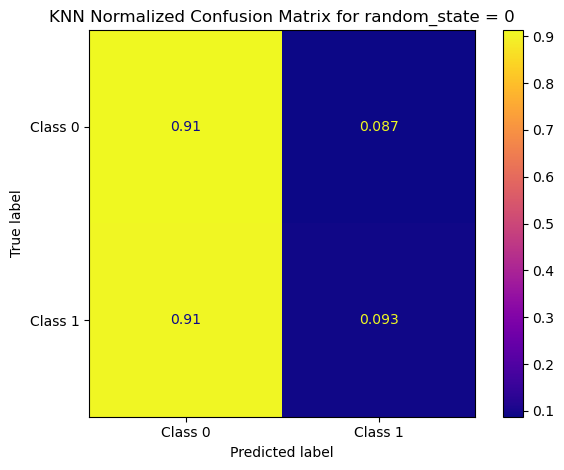

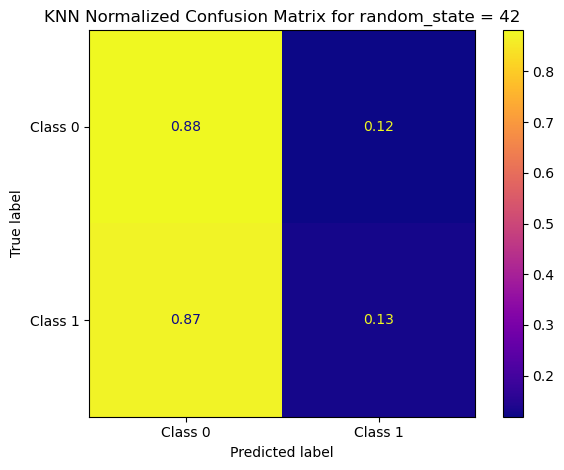

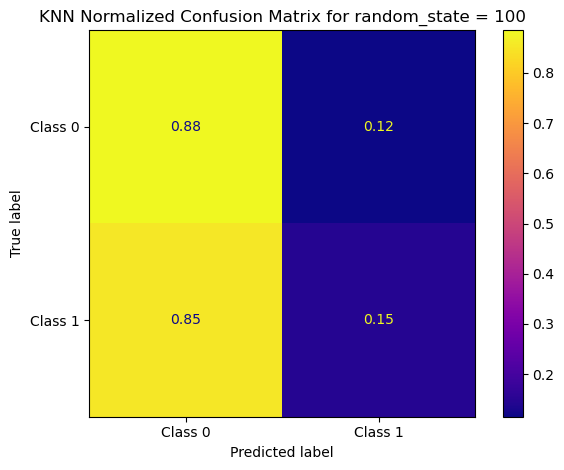

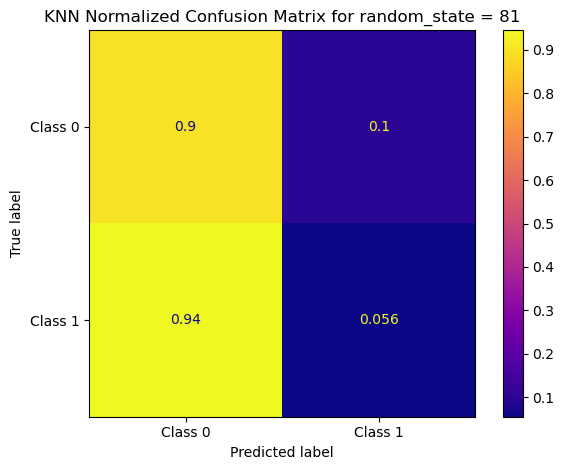

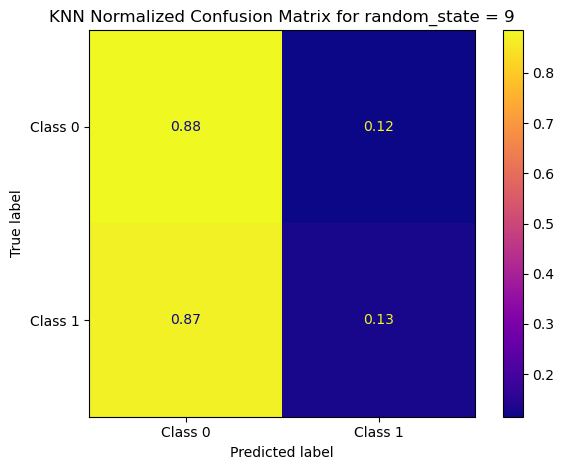

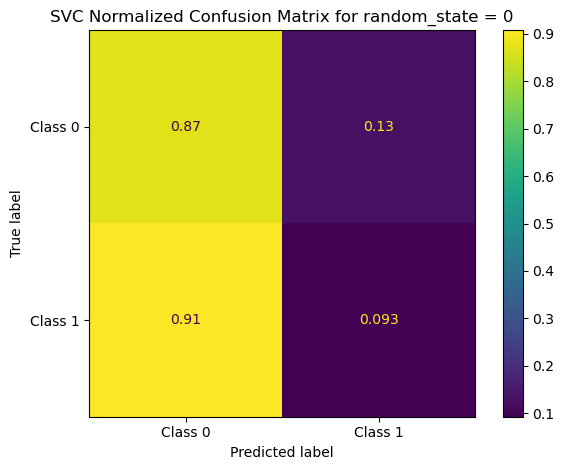

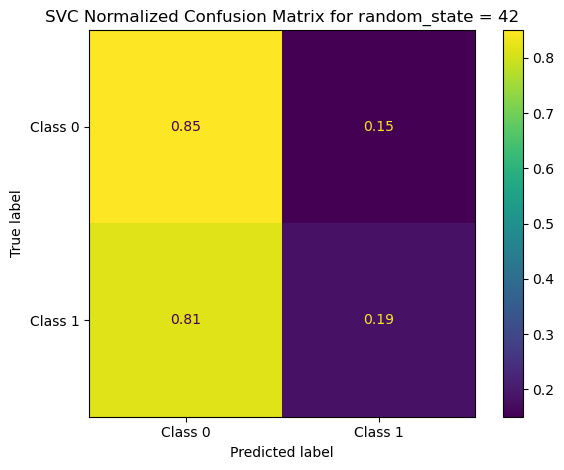

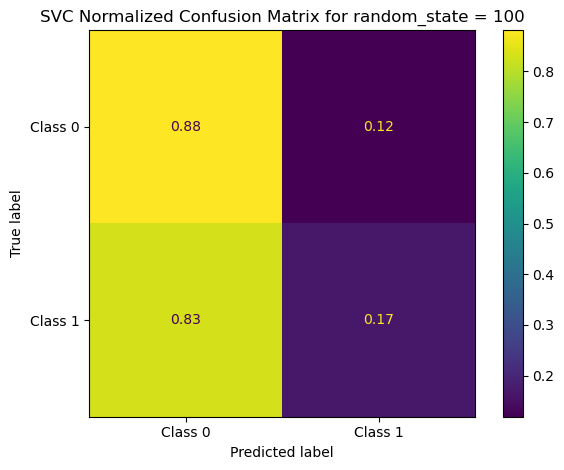

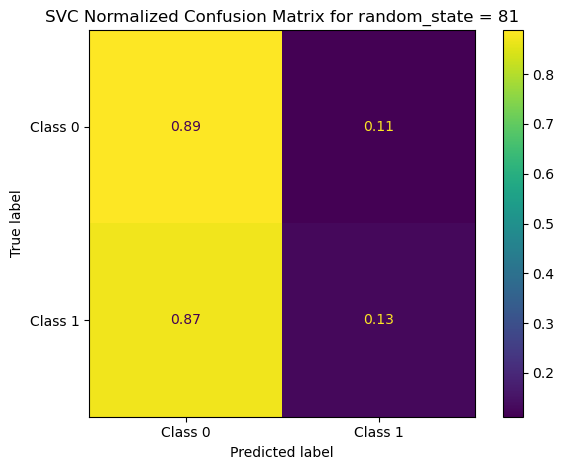

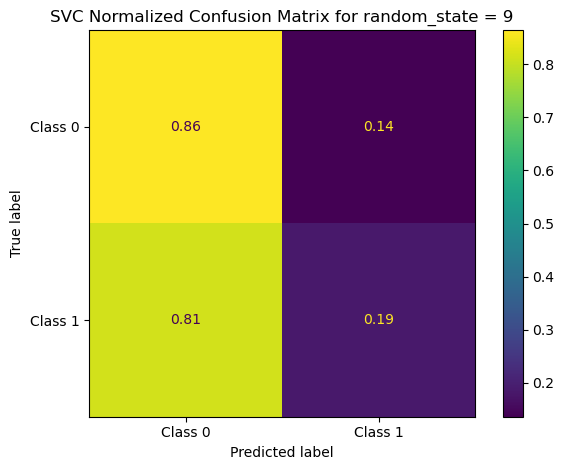

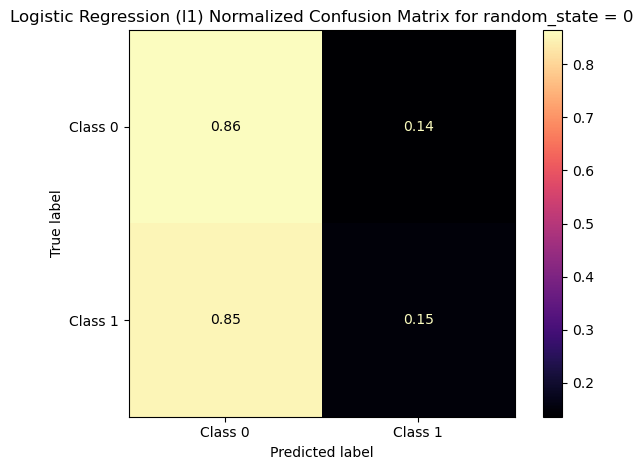

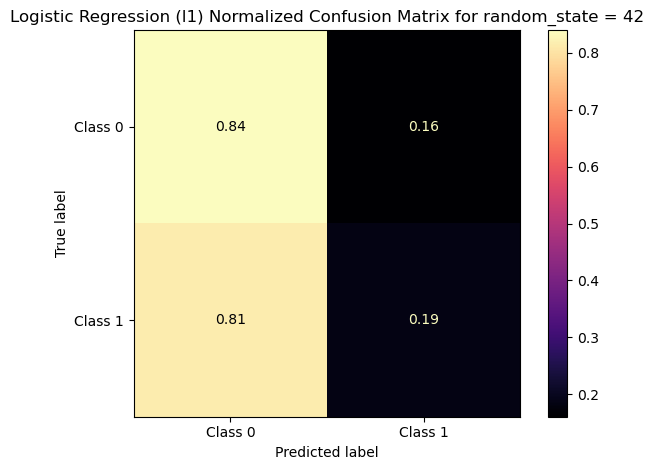

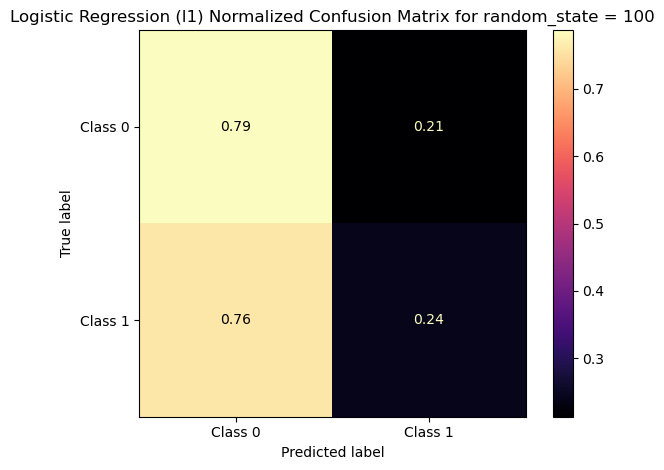

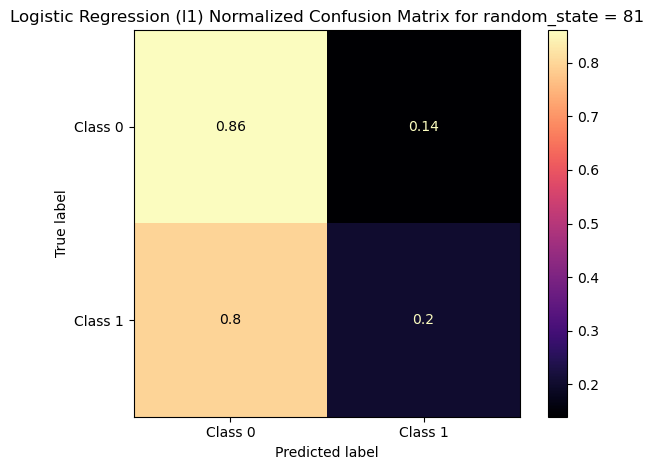

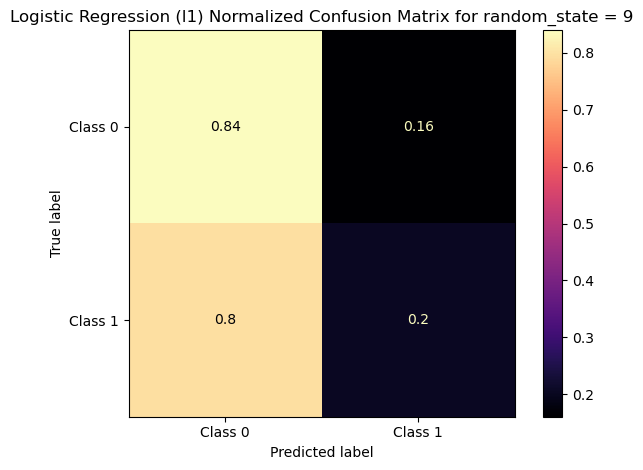

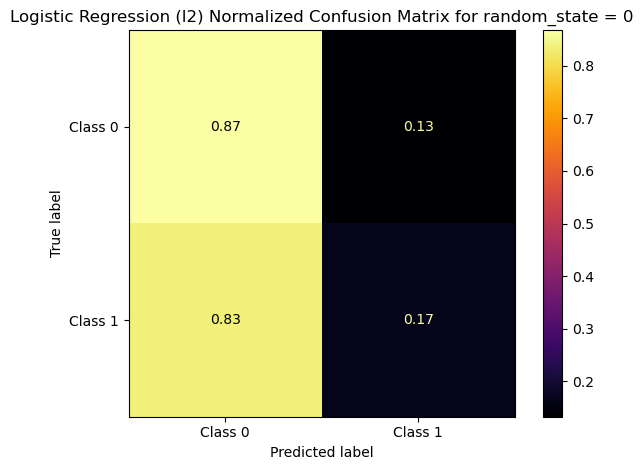

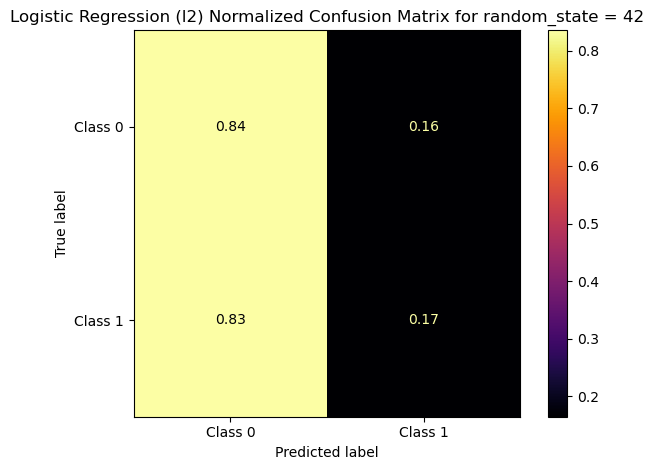

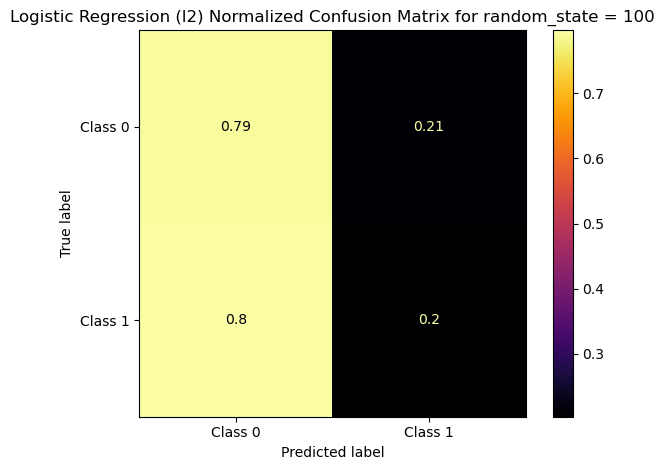

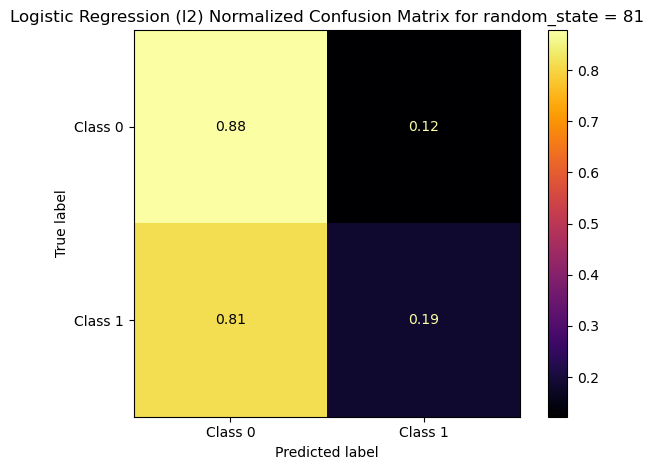

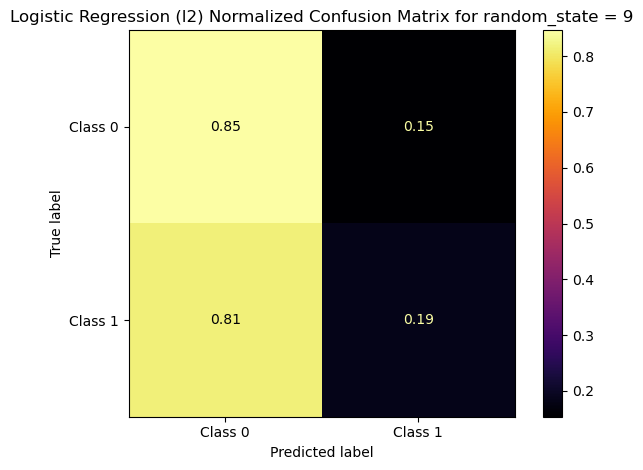

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

plt.figure(figsize=(6, 4))
    
for random_state in random_states:
    with open(f'../results/intermediate results/results_random_state_{random_state}.save', 'rb') as file:
        data = pickle.load(file)
    
    grid, total_f2, y_true, y_pred, X_test, feature_names = data['random_forest_f2']
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=['Class 0', 'Class 1'])
    disp.plot(cmap='cividis')
    plt.title(f'Random Forest Normalized Confusion Matrix for random_state = {random_state}')
    plt.savefig(f'../figures/models/Random Forest Confusion Matrix for random_state = {random_state}.png', dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

for random_state in random_states:
    with open(f'../results/intermediate results/results_random_state_{random_state}.save', 'rb') as file:
        data = pickle.load(file)

    grid, total_f2, y_true, y_pred, X_test, feature_names = data['knn_f2']
    cm = confusion_matrix(y_true, y_pred)
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=['Class 0', 'Class 1'])
    disp.plot(cmap='plasma')
    plt.title(f'KNN Normalized Confusion Matrix for random_state = {random_state}')
    plt.savefig(f'../figures/models/KNN Confusion Matrix for random_state = {random_state}.png', dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

for random_state in random_states:
    with open(f'../results/intermediate results/results_random_state_{random_state}.save', 'rb') as file:
        data = pickle.load(file)
    
    grid, total_f2, y_true, y_pred, X_test, feature_names = data['svc_f2']
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=['Class 0', 'Class 1'])
    disp.plot(cmap='viridis')
    plt.title(f'SVC Normalized Confusion Matrix for random_state = {random_state}')
    plt.savefig(f'../figures/models/SVC Confusion Matrix for random_state = {random_state}.png', dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

for random_state in random_states:
    with open(f'../results/intermediate results/results_random_state_{random_state}.save', 'rb') as file:
        data = pickle.load(file)
    
    grid, total_f2, y_true, y_pred, X_test, feature_names = data['log_reg_l1_f2']
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=['Class 0', 'Class 1'])
    disp.plot(cmap='magma')
    plt.title(f'Logistic Regression (l1) Normalized Confusion Matrix for random_state = {random_state}')
    plt.savefig(f'../figures/models/Logistic Regression (l1) for random_state = {random_state}.png', dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

for random_state in random_states:
    with open(f'../results/intermediate results/results_random_state_{random_state}.save', 'rb') as file:
        data = pickle.load(file)
    
    grid, total_f2, y_true, y_pred, X_test, feature_names = data['log_reg_l2_f2']
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=['Class 0', 'Class 1'])
    disp.plot(cmap='inferno')
    plt.title(f'Logistic Regression (l2) Normalized Confusion Matrix for random_state = {random_state}')
    plt.savefig(f'../figures/models/Logistic Regression (l2) Confusion Matrix for random_state = {random_state}.png', dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

### Feature Importance

#### Global Feature Importance

In [39]:
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model since knn doesn't work bc of missing values...

for random_state in random_states:
    with open(f'../results/intermediate results/results_random_state_{random_state}.save', 'rb') as file:
        data = pickle.load(file)
    
    grid, total_f2, y_true, y_pred, X_test, feature_names = data['random_forest_f2']
    explainer = shap.TreeExplainer(grid.best_estimator_)
    shap_values = explainer.shap_values(X_test)
    
    shap.summary_plot(shap_values[:,:,1], X_test, feature_names=feature_names, show=False)
    plt.title(f"Global Feature Importance for random_state = {random_state}")
    plt.savefig(f'../figures/models/global summary_plot for random_state={random_state}.png', dpi=300)
    plt.close()

#### Local Feature Importance

In [56]:
with open(f'../results/intermediate results/results_random_state_42.save', 'rb') as file:
    data = pickle.load(file)

plt.figure(figsize=(6, 8))

grid, total_f2, y_true, y_pred, X_test, feature_names = data['random_forest_f2']
explainer = shap.TreeExplainer(grid.best_estimator_)
shap_values = explainer.shap_values(X_test)

print("average prediction:", explainer.expected_value[1]) 
shap.force_plot(explainer.expected_value[1], shap_values[1,:,1], features=X_test.iloc[1], feature_names=feature_names, show=False, matplotlib=True)
plt.title(f"Local Feature Importance for Index 1 (random_state = 42)", y=-0.01)
plt.savefig(f'../figures/models/index 1 random state 42 force plot.png', dpi=300)

average prediction: 0.16064992614475632


In [57]:
with open(f'../results/intermediate results/results_random_state_42.save', 'rb') as file:
    data = pickle.load(file)

plt.figure(figsize=(6, 8))

grid, total_f2, y_true, y_pred, X_test, feature_names = data['random_forest_f2']
explainer = shap.TreeExplainer(grid.best_estimator_)
shap_values = explainer.shap_values(X_test)

print("average prediction:", explainer.expected_value[1]) 
shap.force_plot(explainer.expected_value[1], shap_values[50,:,1], features=X_test.iloc[50], feature_names=feature_names, show=False, matplotlib=True)
plt.title(f"Local Feature Importance for Index 50 (random_state = 42)", y=-0.01)
plt.savefig(f'../figures/models/index 50 random state 42 force plot.png', dpi=300)

average prediction: 0.16064992614475632


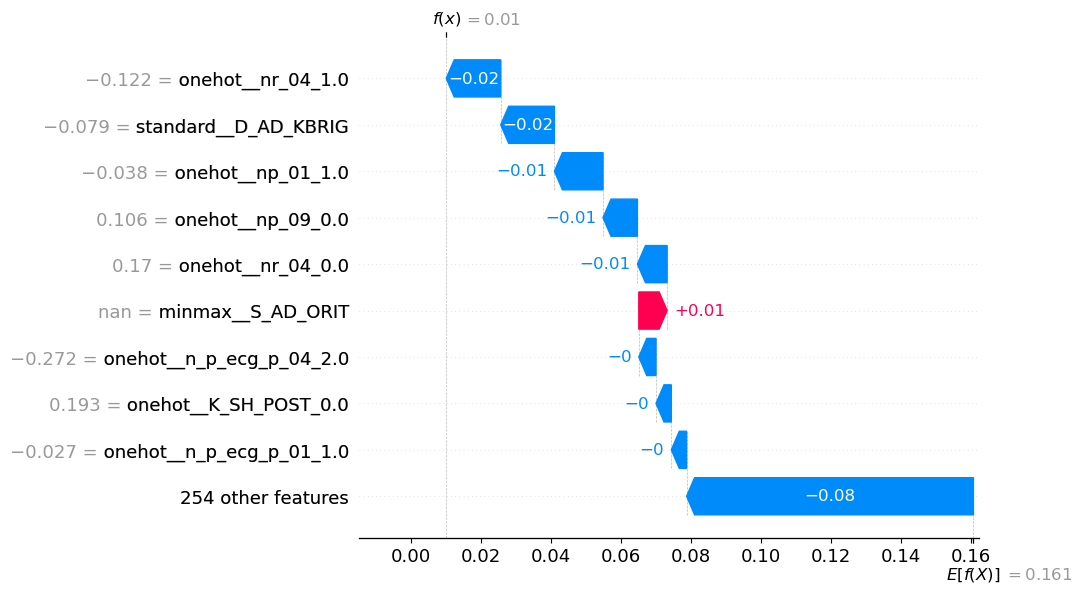

In [83]:
# Close any previous figures
plt.close()
from IPython.display import display, HTML

# Create a new figure with specified size
plt.figure(figsize=(12, 10))  # Adjust size as needed
display(HTML("<h3 style='text-align: center;'>SHAP Waterfall Plot: Breakdown of Local Feature Contributions for Index 0</h3>"))
# Create SHAP waterfall plot
shap.waterfall_plot(shap.Explanation(
        values=shap_values[0, :, 1],  # Assuming index 50
        base_values=explainer.expected_value[1],  # Assuming class 1
        data=X_test.iloc[0],  # Use the correct index here
        feature_names=feature_names
    ), max_display=10)

# Title and save the figure

# Close the plot after saving
plt.close()

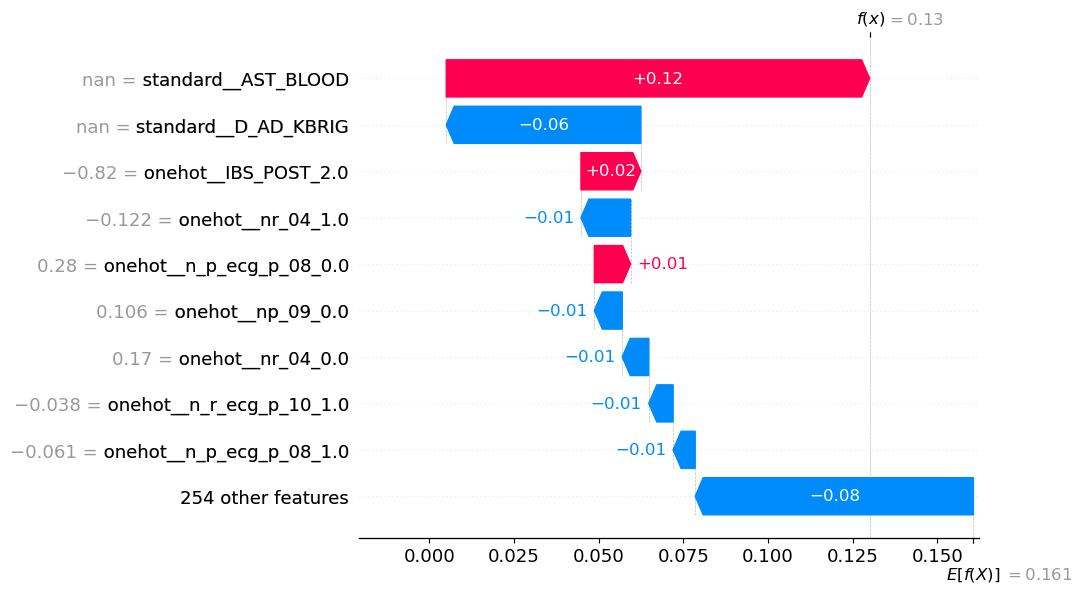

In [84]:
# Close any previous figures
plt.close()

# Create a new figure with specified size
plt.figure(figsize=(12, 10))  # Adjust size as needed

display(HTML("<h3 style='text-align: center;'>SHAP Waterfall Plot: Breakdown of Local Feature Contributions for Index 50</h3>"))
# Create SHAP waterfall plot
shap.waterfall_plot(shap.Explanation(
        values=shap_values[50, :, 1],  # Assuming index 50
        base_values=explainer.expected_value[1],  # Assuming class 1
        data=X_test.iloc[50],  # Use the correct index here
        feature_names=feature_names
    ), max_display=10)

# Title and save the figure

# Close the plot after saving
plt.close()